<a href="https://colab.research.google.com/github/ritikjain00/Perfume-Data-Analysis/blob/main/Perfume_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [2]:
from google.colab import files
file = files.upload()

Saving perfume_data.xlsx to perfume_data (1).xlsx


In [3]:
data = pd.read_excel('perfume_data.xlsx',header=None)

In [4]:
print('Shape of data is: ',data.shape)
print('\n')
data.head(5)

Shape of data is:  (20, 29)




,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28
0,ajayeb,64558,64556,64543,64543,64541,64543,64543,64541,64541,64541,64541,64541,64541,64528,64528,63529,63529,64541,64541,64541,64541,64541,64541,64541,64528,64528,64528,64528
1,ajmal,60502,60489,61485,60487,61485,61513,60515,60500,60500,60487,60500,61526,60528,60528,60528,60500,61483,61485,60472,60472,60461,61470,60487,60487,61485,60487,60472,60472
2,amreaj,57040,57040,57040,58041,58041,58041,58041,57042,57042,58043,58043,58043,58043,58043,57042,58041,58041,58041,58041,58041,58041,58041,58041,58041,58041,58041,58041,58041
3,aood,71083,72087,71091,71095,71099,72103,71099,72099,72099,73098,72094,73094,72091,72091,72091,72095,72095,72095,72095,71095,71095,72103,71103,71103,71103,72103,72103,72098
4,asgar_ali,68209,68209,68216,68216,68223,68223,68223,68223,68230,68230,68230,68230,68230,68230,68223,68223,68223,68223,68230,67224,67217,67217,68223,68223,68223,68223,68223,68230


We need to rename the 0th column as perfume column.

In [5]:
data['perfume'] = data[0]
data = data.drop(0, axis = 1)

In [6]:
data.head(5)

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,perfume
0,64558,64556,64543,64543,64541,64543,64543,64541,64541,64541,64541,64541,64541,64528,64528,63529,63529,64541,64541,64541,64541,64541,64541,64541,64528,64528,64528,64528,ajayeb
1,60502,60489,61485,60487,61485,61513,60515,60500,60500,60487,60500,61526,60528,60528,60528,60500,61483,61485,60472,60472,60461,61470,60487,60487,61485,60487,60472,60472,ajmal
2,57040,57040,57040,58041,58041,58041,58041,57042,57042,58043,58043,58043,58043,58043,57042,58041,58041,58041,58041,58041,58041,58041,58041,58041,58041,58041,58041,58041,amreaj
3,71083,72087,71091,71095,71099,72103,71099,72099,72099,73098,72094,73094,72091,72091,72091,72095,72095,72095,72095,71095,71095,72103,71103,71103,71103,72103,72103,72098,aood
4,68209,68209,68216,68216,68223,68223,68223,68223,68230,68230,68230,68230,68230,68230,68223,68223,68223,68223,68230,67224,67217,67217,68223,68223,68223,68223,68223,68230,asgar_ali


In [7]:
perfumed = list(data['perfume'])
perfumed 

['ajayeb',
 'ajmal',
 'amreaj',
 'aood',
 'asgar_ali',
 'bukhoor',
 'burberrry',
 'dehenalaod',
 'junaid',
 'kausar',
 'rose',
 'solidmusk',
 'TeaTreeOil',
 'raspberry',
 'RoseMusk',
 'strawberry',
 'constrected2',
 'carolina_herrera',
 "oudh_ma'alattar",
 'constrected']

As each row in the data frame consists of 28 Odometer measurement values and the corresponding name of the Perfume. This data has to be converted into a form which has each observation as a row and each attribute as column.¶

In [8]:
df = pd.DataFrame([], columns = ['Observation', 'Perfume'])
print(df)

Empty DataFrame
Columns: [Observation, Perfume]
Index: []


In [9]:
observations = np.array([])
labels = np.array([])

for perfume in range(len(perfumed)):
    for i in range(27):
        obs, label = data.iloc[perfume,i], data.iloc[perfume,-1]
        observations = np.append(observations, obs)
        labels = np.append(labels, label)

In [10]:
observations = pd.Series(observations)
labels = pd.Series(labels)

In [11]:
df.Observation = observations
df.Perfume = labels

In [12]:
df.head()

,Observation,Perfume
0,64558.0,ajayeb
1,64556.0,ajayeb
2,64543.0,ajayeb
3,64543.0,ajayeb
4,64541.0,ajayeb


In [13]:
#Shuffling the dataset
df = df.sample(frac=1, random_state=10).reset_index(drop=True)
df.head()

,Observation,Perfume
0,60093.0,burberrry
1,85056.0,RoseMusk
2,71999.0,strawberry
3,83382.0,TeaTreeOil
4,60461.0,ajmal


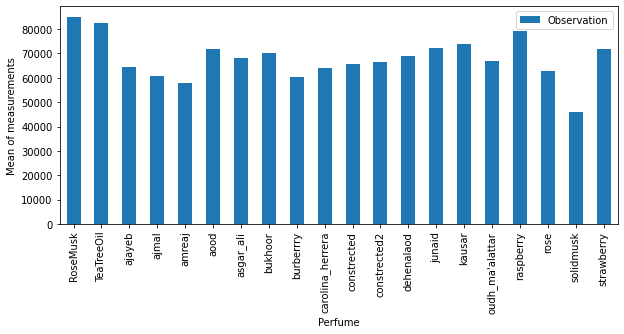

In [14]:
df.groupby('Perfume').mean().plot(kind='bar', figsize=(10,4))
plt.ylabel('Mean of measurements')
plt.show()

In [15]:
df.groupby('Perfume').mean()

,Observation
Perfume,
RoseMusk,85056.000000
TeaTreeOil,82428.111111
ajayeb,64465.111111
ajmal,60790.148148
amreaj,57819.148148
aood,71800.074074
asgar_ali,68111.740741
bukhoor,70269.111111
burberrry,60462.185185


In [16]:
le = LabelEncoder()
df['Label'] = le.fit_transform(df.Perfume)

In [17]:
X = df.Observation.to_numpy().reshape(-1, 1)
y = df.Label

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 10)

In [19]:
RFR = RandomForestClassifier(n_estimators=100 ,random_state=10)
RFR.fit(X_train, y_train)

y_pred_rfr = RFR.predict(X_test)

print('Accuracy Score: ',  accuracy_score(y_test, y_pred_rfr))
print('\nConfusion matrix:\n ', confusion_matrix(y_test, y_pred_rfr))

Accuracy Score:  0.9814814814814815

Confusion matrix:
  [[10  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  6  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  8  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  4  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  5  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  4  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0 10  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  5  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  6  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  6  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  8  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  8  2  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  9  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0 10  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  7  0  0  0  0  0

In [20]:
DTC = DecisionTreeClassifier(random_state=10)
DTC.fit(X_train, y_train)

y_pred_dtc = DTC.predict(X_test)

print('Accuracy Score: ',  accuracy_score(y_test, y_pred_dtc))
print('\nConfusion matrix:\n ', confusion_matrix(y_test, y_pred_dtc))

Accuracy Score:  0.9814814814814815

Confusion matrix:
  [[10  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  6  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  8  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  4  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  5  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  4  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0 10  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  5  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  6  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  6  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  8  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  8  2  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  9  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0 10  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  7  0  0  0  0  0

Both Decision Tree classifier and Random Forest Classifier shows the same accuracy.
So both models are best fit.